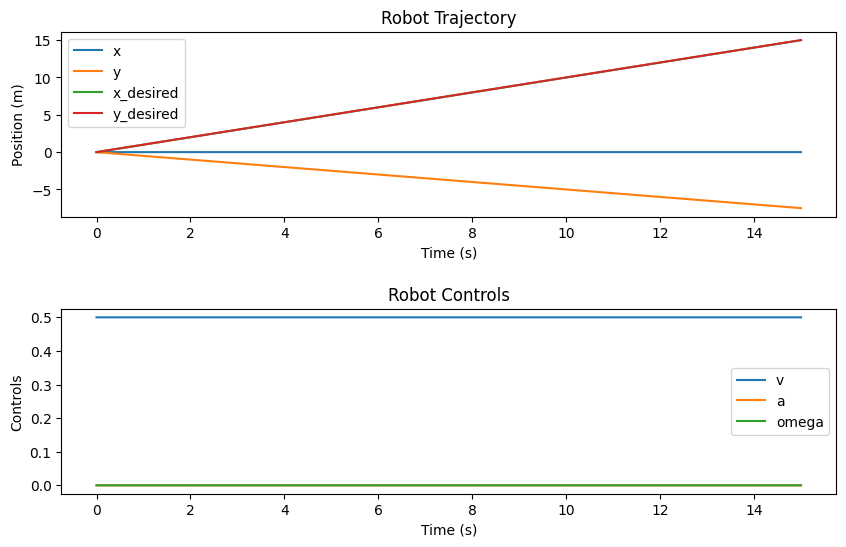

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define desired coefficients
a0 = 0
a1 = 1
a2 = 0
a3 = 0
b0 = 0
b1 = 1
b2 = 0
b3 = 0

# Generate desired trajectory
def x_desired(t):
    return a0 * t**0 + a1 * t**1 + a2 * t**2 + a3 * t**3

def y_desired(t):
    return b0 * t**0 + b1 * t**1 + b2 * t**2 + b3 * t**3

# Initialize time parameters and arrays to store state and controls
t0 = 0
tf = 15
dt = 0.01
t = np.linspace(t0, tf, int(tf / dt) + 1)
x = np.zeros(len(t))
y = np.zeros(len(t))
v = np.zeros(len(t))
theta = np.zeros(len(t))
a = np.zeros(len(t))
omega = np.zeros(len(t))

# Initial conditions
x[0] = 0
y[0] = 0
v[0] = 0.5
theta[0] = -np.pi / 2

# Loop over time steps
for i in range(1, len(t)):
    # Calculate desired acceleration
    x_double_dot = 6 * a3 * t[i] + 2 * a2
    y_double_dot = 6 * b3 * t[i] + 2 * b2

    # Calculate controls
    a[i] = np.linalg.inv([[1, 0], [0, 1]]) @ np.array([v[i] * np.cos(theta[i]), v[i] * np.sin(theta[i])]) @ np.array([1, 0])
    omega[i] = np.linalg.inv([[1, 0], [0, 1]]) @ np.array([v[i] * np.cos(theta[i]), v[i] * np.sin(theta[i])]) @ np.array([0, 1])

    # Update state using Euler's method
    v[i] = v[i - 1] + a[i] * dt
    theta[i] = theta[i - 1] + omega[i] * dt
    x[i] = x[i - 1] + v[i] * np.cos(theta[i]) * dt
    y[i] = y[i - 1] + v[i] * np.sin(theta[i]) * dt

# Plot the resulting trajectory and controls
plt.figure(figsize=(10, 6))

plt.subplot(211)
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.plot(t, x_desired(t), label='x_desired')
plt.plot(t, y_desired(t), label='y_desired')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Robot Trajectory')

plt.subplot(212)
plt.plot(t, v, label='v')
plt.plot(t, a, label='a')
plt.plot(t, omega, label='omega')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Controls')
plt.title('Robot Controls')

plt.subplots_adjust(hspace=0.5)
plt.show()
